#Análise do Anuário Brasilero de Segurança Pública 

### Cobertura Temporal: 2016 - 2021

A base contempla as informações do Anuário de Segurança Pública a partir de 2016 com as estatísticas criminais compatibilizadas entre anos, com informações acerca dos homicídios, tráfico, furto e roubo, além da força policial, entre outros ao nível das capitais brasileiras e distrito federal.

Base de dados: [link](https://basedosdados.org/dataset/br-fbsp-absp?bdm_table=municipio)


In [ ]:
# Instalando biblioteca para acessar api da basedosdados
!pip install basedosdados

In [ ]:
# instalando biblioteca do power bi
!pip install powerbiclient

In [3]:
# Importando bibliotecas
# (importing libraries)


# bibliotecas para modelagem e matrizes
# (libraries for modeling and matrices)
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [4]:
#Importando biblioteca para utilização dos dashboard do power bi

from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [5]:
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_fbsp_absp',
table_id='municipio',
billing_project_id="YOUR_PROJECT_ID")

Downloading: 100%|██████████| 162/162 [00:00<00:00, 437.97rows/s]


In [6]:
# Verificando informações sobre a base de dados
# (check information)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   ano                                                                    162 non-null    Int64  
 1   sigla_uf                                                               162 non-null    object 
 2   id_municipio                                                           162 non-null    object 
 3   grupo                                                                  108 non-null    object 
 4   quantidade_homicidio_doloso                                            162 non-null    Int64  
 5   quantidade_latrocinio                                                  162 non-null    Int64  
 6   quantidade_lesao_corporal_morte                                        160 non-null    Int

In [7]:
# Descrição base de dados 
# Description database

df.describe()

,ano,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,quantidade_mortes_intervencao_policial_militar_em_servico,quantidade_mortes_intervencao_policial_civil_fora_de_servico,quantidade_mortes_intervencao_policial_militar_fora_de_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
count,162.0,162.0,162.0,160.0,157.0,157.0,40.0,42.0,38.0,39.0,...,154.000000,73.0,84.0,101.0,108.0,107.0,50.0,51.0,50.0,52.0
mean,2018.5,416.191358,18.549383,8.3625,4.101911,70.898089,1.75,41.690476,1.473684,11.794872,...,11.175325,147.684932,268.333333,388.623762,1564.546296,1211.065421,0.16,1.352941,0.68,3.923077
std,1.713121,362.095669,21.162211,11.874865,8.15647,126.154067,3.499084,60.830628,3.261046,31.26136,...,9.945034,221.25299,280.700515,405.126495,1686.788224,1900.215689,0.548095,3.41071,0.978128,6.902248
min,2016.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,5.0,23.0,25.0,88.0,0.0,0.0,0.0,0.0,0.0
25%,2017.0,156.5,5.0,1.0,0.0,10.0,0.0,7.75,0.0,0.0,...,4.000000,38.0,116.25,132.0,460.25,163.5,0.0,0.0,0.0,0.0
50%,2018.5,287.5,12.0,4.0,1.0,22.0,0.0,22.5,0.0,4.0,...,7.000000,83.0,213.5,306.0,1055.0,505.0,0.0,0.0,0.0,2.0
75%,2020.0,579.75,22.0,13.0,4.0,63.0,2.0,50.0,1.0,7.5,...,17.750000,175.0,296.25,496.0,2028.0,1440.0,0.0,1.0,1.0,3.25
max,2021.0,1932.0,118.0,103.0,55.0,726.0,17.0,281.0,16.0,147.0,...,37.000000,1432.0,1847.0,2978.0,8651.0,11964.0,3.0,17.0,4.0,36.0


In [8]:
# Eliminando a coluna grupo e id_municipio pois não será utilizada durante o processo de análise
# (Eliminating the column group and id_municipio as it will not be used during the analysis process)

df.drop(columns=['grupo', 'id_municipio'], inplace=True)

#Primeira Análise

Nessa primeira análise foi verificado as colunas de taxa de morte por homicídio doloso, lesão corporal, mortes violentas intencionais e quantidade de latrocínio.


In [9]:
# Análise dos estados com maior taxa de morte por homicidio doloso, lesão corporal, mortes violentas internacionais e quantidade de latrocinio 
analise_1 = df[['sigla_uf','quantidade_homicidio_doloso', 'quantidade_latrocinio', 'quantidade_lesao_corporal_morte', 'quantidade_mortes_violentas_intencionais']]
analise_1

,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_violentas_intencionais
0,AL,449,21,2,531
1,CE,965,27,15,1046
2,ES,51,0,3,63
3,GO,452,33,14,599
4,MA,498,23,12,560
...,...,...,...,...,...
157,AC,92,4,1,97
158,AM,1060,44,12,1185
159,AP,184,18,9,330
160,RO,161,5,6,178


In [10]:
# Agrupando por estado 
analise_1 = analise_1.groupby(by=['sigla_uf']).sum().reset_index()
analise_1

,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_violentas_intencionais
0,AC,1191,44,2,1237
1,AL,2432,62,12,2622
2,AM,5209,323,135,6004
3,AP,1273,69,91,1852
4,BA,7139,154,92,8577
5,CE,7065,108,88,7553
6,DF,2678,194,35,2953
7,ES,419,5,15,477
8,GO,1962,86,75,2681
9,MA,1819,122,40,2128


In [11]:
# Criando coluna com o total de crimes 
analise_1['total'] = analise_1['quantidade_homicidio_doloso'] + analise_1['quantidade_latrocinio'] + analise_1['quantidade_lesao_corporal_morte'] + analise_1['quantidade_mortes_violentas_intencionais']
analise_1

,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_violentas_intencionais,total
0,AC,1191,44,2,1237,2474
1,AL,2432,62,12,2622,5128
2,AM,5209,323,135,6004,11671
3,AP,1273,69,91,1852,3285
4,BA,7139,154,92,8577,15962
5,CE,7065,108,88,7553,14814
6,DF,2678,194,35,2953,5860
7,ES,419,5,15,477,916
8,GO,1962,86,75,2681,4804
9,MA,1819,122,40,2128,4109


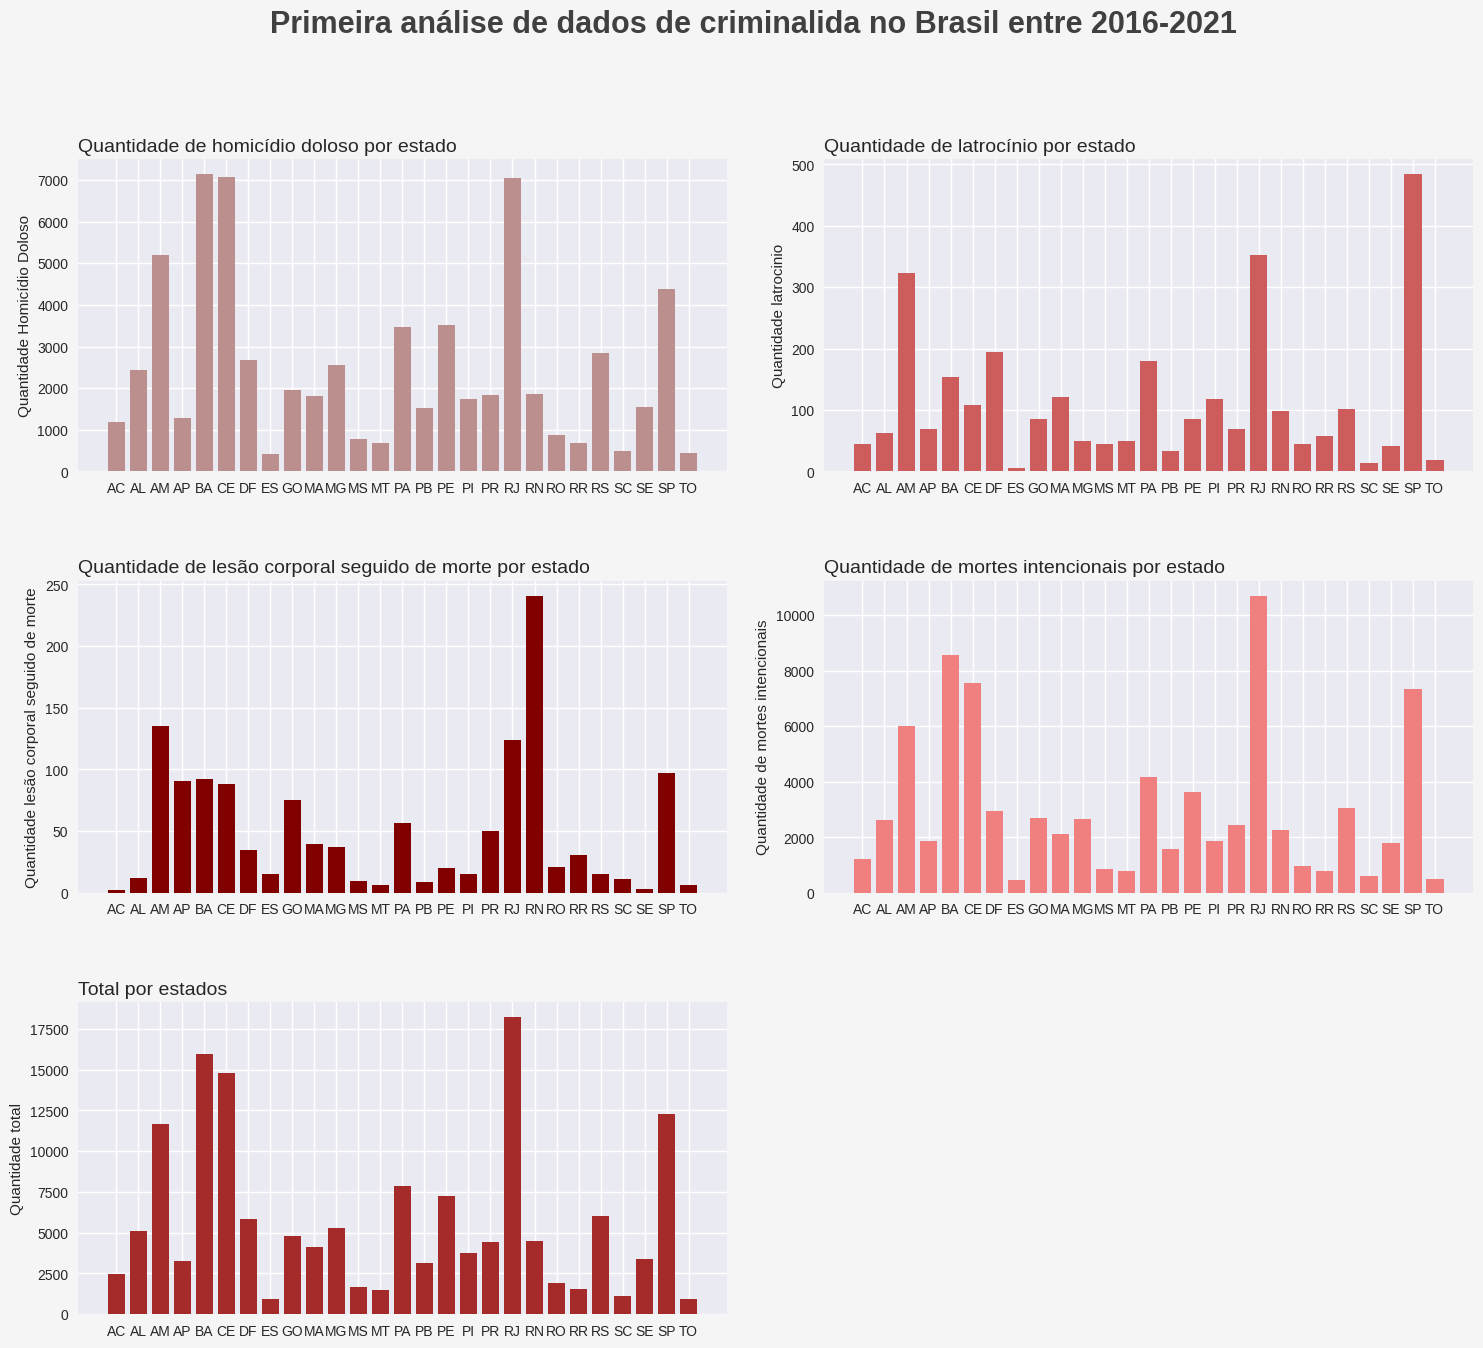

In [55]:
# Criando relatorio utilizando Python 

# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18, 15))
colunas = 2
linhas = 3

# cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos 
plt.style.use('seaborn')

# incluindo subtitulo
plt.suptitle('Primeira análise de dados de criminalida no Brasil entre 2016-2021', fontsize=22, color='#404040', fontweight=600)

# Parametros para os grid 
for c in range(1, 6): 
  plt.subplot(linhas, colunas, c)
  if c == 1:
    # Titulo
      plt.title('Quantidade de homicídio doloso por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_1['sigla_uf'], analise_1['quantidade_homicidio_doloso'], color='rosybrown')

      # Label
      plt.ylabel('Quantidade Homicídio Doloso');
  elif c == 2:
    # Titulo
      plt.title('Quantidade de latrocínio por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_1['sigla_uf'], analise_1['quantidade_latrocinio'], color='indianred')

      # Label
      plt.ylabel('Quantidade latrocinio');
  elif c == 3:
    # Titulo
      plt.title('Quantidade de lesão corporal seguido de morte por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_1['sigla_uf'], analise_1['quantidade_lesao_corporal_morte'], color='maroon')

      # Label
      plt.ylabel('Quantidade lesão corporal seguido de morte');
  elif c == 4:
    # Titulo
      plt.title('Quantidade de mortes intencionais por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_1['sigla_uf'], analise_1['quantidade_mortes_violentas_intencionais'], color='lightcoral')

      # Label
      plt.ylabel('Quantidade de mortes intencionais');
  else:
    # Titulo
      plt.title('Total por estados', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_1['sigla_uf'], analise_1['total'], color='brown')

      # Label
      plt.ylabel('Quantidade total');

  
# Ajustando o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15 )




# Criando gráfico utilizando a bibliotca do power bi

In [ ]:
# Autenticação com conta corporativa ou estudante
device_auth = DeviceCodeLoginAuthentication()

In [43]:
from google.colab import output
output.enable_custom_widget_manager()

In [44]:
PBI_visualize = QuickVisualize(get_dataset_config(analise_1), auth=device_auth)

In [45]:
PBI_visualize

QuickVisualize()

#Segunda análise

Nessa segunda análise separei por quantidade de feminicidio, lesão corporal dolosa domestica e quantidade de estupro e com isso conseguimos análisar os estados com maior quantidade de crime relacionado a esse assunto.


In [17]:
analise_2 = df[['sigla_uf',
                'quantidade_feminicidio',
                'quantidade_lesao_corporal_dolosa_violencia_domestica',
                'quantidade_estupro']]
analise_2

,sigla_uf,quantidade_feminicidio,quantidade_lesao_corporal_dolosa_violencia_domestica,quantidade_estupro
0,AL,<NA>,<NA>,155
1,CE,<NA>,<NA>,458
2,ES,<NA>,<NA>,25
3,GO,<NA>,<NA>,161
4,MA,<NA>,<NA>,224
...,...,...,...,...
157,AC,4,704,213
158,AM,11,2194,590
159,AP,2,669,316
160,RO,3,1231,264


In [18]:
analise_2 = analise_2.groupby(by=['sigla_uf']).sum().reset_index()
analise_2

,sigla_uf,quantidade_feminicidio,quantidade_lesao_corporal_dolosa_violencia_domestica,quantidade_estupro
0,AC,20,1526,765
1,AL,34,2499,1450
2,AM,39,8958,4771
3,AP,13,1506,1777
4,BA,53,8703,3038
5,CE,20,5121,3145
6,DF,102,24931,4400
7,ES,9,520,444
8,GO,20,8455,1768
9,MA,17,3968,1371


In [19]:
#Criando coluna com total de crime por estado 

analise_2['total'] = analise_2['quantidade_feminicidio'] + analise_2['quantidade_lesao_corporal_dolosa_violencia_domestica'] + analise_2['quantidade_estupro']
analise_2

,sigla_uf,quantidade_feminicidio,quantidade_lesao_corporal_dolosa_violencia_domestica,quantidade_estupro,total
0,AC,20,1526,765,2311
1,AL,34,2499,1450,3983
2,AM,39,8958,4771,13768
3,AP,13,1506,1777,3296
4,BA,53,8703,3038,11794
5,CE,20,5121,3145,8286
6,DF,102,24931,4400,29433
7,ES,9,520,444,973
8,GO,20,8455,1768,10243
9,MA,17,3968,1371,5356


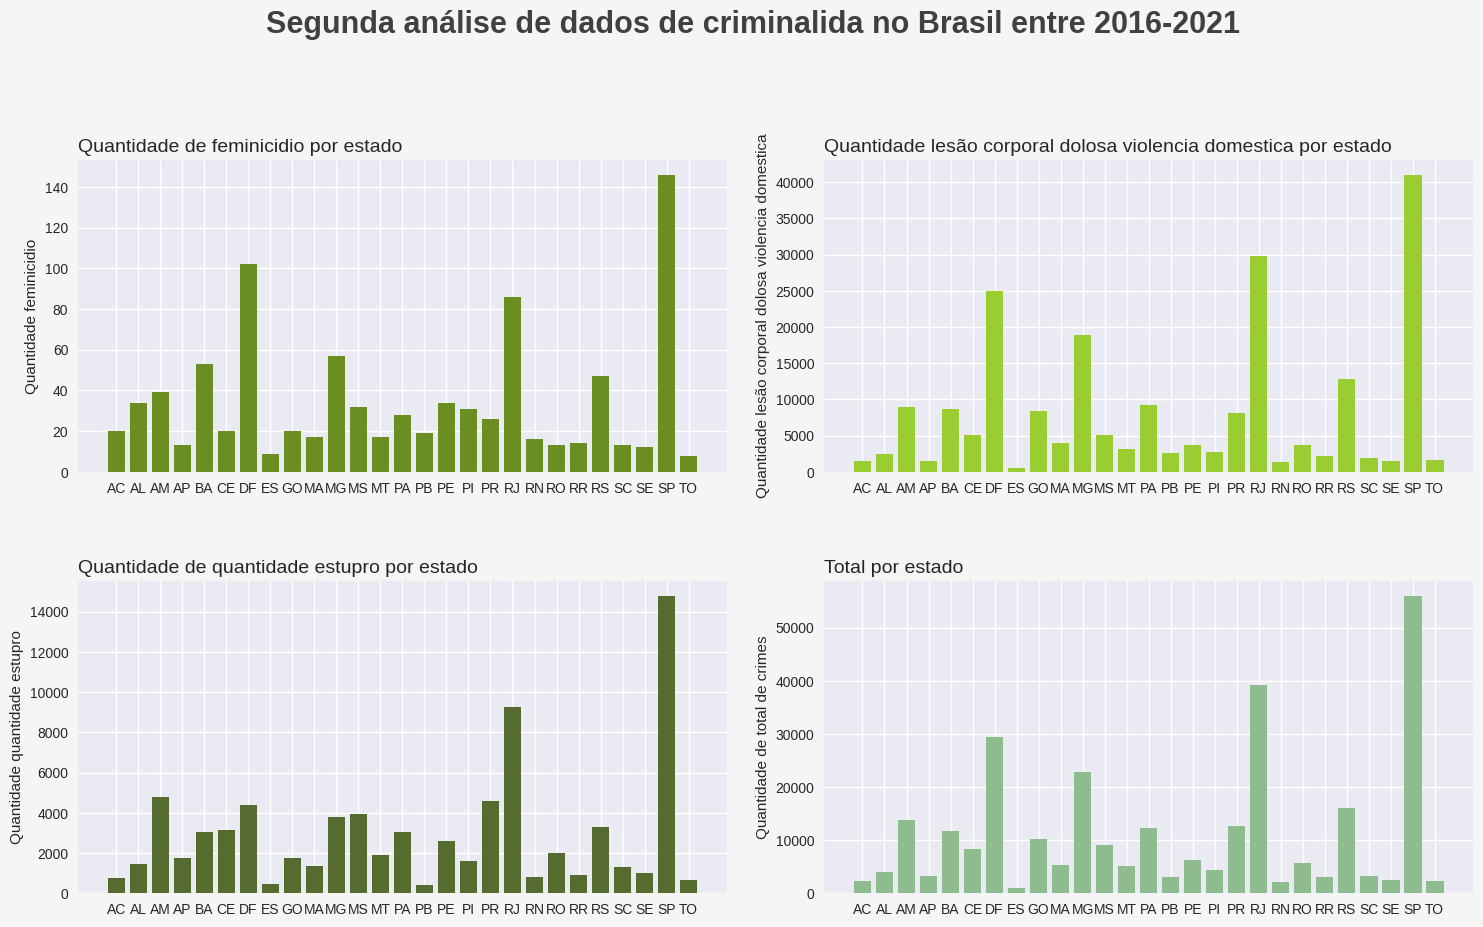

In [54]:
# Criando relatorio utilizando Python 

# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18, 15))
colunas = 2
linhas = 3

# cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos 
plt.style.use('seaborn')

# incluindo subtitulo
plt.suptitle('Segunda análise de dados de criminalida no Brasil entre 2016-2021', fontsize=22, color='#404040', fontweight=600)

# Parametros para os grid 
for c in range(1, 5): 
  plt.subplot(linhas, colunas, c)
  if c == 1:
    # Titulo
      plt.title('Quantidade de feminicidio por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_2['sigla_uf'], analise_2['quantidade_feminicidio'], color='olivedrab')

      # Label
      plt.ylabel('Quantidade feminicidio');
  elif c == 2:
    # Titulo
      plt.title('Quantidade lesão corporal dolosa violencia domestica por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_2['sigla_uf'], analise_2['quantidade_lesao_corporal_dolosa_violencia_domestica'], color='yellowgreen')

      # Label
      plt.ylabel('Quantidade lesão corporal dolosa violencia domestica');
  elif c == 3:
    # Titulo
      plt.title('Quantidade de quantidade estupro por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_2['sigla_uf'], analise_2['quantidade_estupro'], color='darkolivegreen')

      # Label
      plt.ylabel('Quantidade quantidade estupro');
  else:
    # Titulo
      plt.title('Total por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_2['sigla_uf'], analise_2['total'], color='darkseagreen')

      # Label
      plt.ylabel('Quantidade de total de crimes');
  

# Ajustando o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15 )

#Criando o relátorio através da biblioteca do power bi 

In [46]:
PBI_visualize_2 = QuickVisualize(get_dataset_config(analise_2), auth=device_auth)

In [47]:
PBI_visualize_2

QuickVisualize()

#Terceira análise
Nesse parte foi verificado a quantidade de roubo e furto de veiculo

In [23]:
analise_3 = df[['sigla_uf', 'quantidade_roubo_veiculos', 'quantidade_furto_veiculos']]
analise_3

,sigla_uf,quantidade_roubo_veiculos,quantidade_furto_veiculos
0,AL,1233,305
1,CE,6415,2820
2,ES,227,338
3,GO,7298,3733
4,MA,1678,487
...,...,...,...
157,AC,792,303
158,AM,2235,1710
159,AP,232,248
160,RO,<NA>,<NA>


In [24]:
analise_3 = analise_3.groupby(by=['sigla_uf']).sum().reset_index()
analise_3

,sigla_uf,quantidade_roubo_veiculos,quantidade_furto_veiculos
0,AC,2328,1088
1,AL,4784,4042
2,AM,17826,14056
3,AP,1882,3335
4,BA,31400,7802
5,CE,29847,15385
6,DF,22180,31219
7,ES,1833,3594
8,GO,18088,16205
9,MA,7362,3845


In [25]:
analise_3['total'] = analise_3['quantidade_roubo_veiculos'] + analise_3['quantidade_furto_veiculos']
analise_3

,sigla_uf,quantidade_roubo_veiculos,quantidade_furto_veiculos,total
0,AC,2328,1088,3416
1,AL,4784,4042,8826
2,AM,17826,14056,31882
3,AP,1882,3335,5217
4,BA,31400,7802,39202
5,CE,29847,15385,45232
6,DF,22180,31219,53399
7,ES,1833,3594,5427
8,GO,18088,16205,34293
9,MA,7362,3845,11207


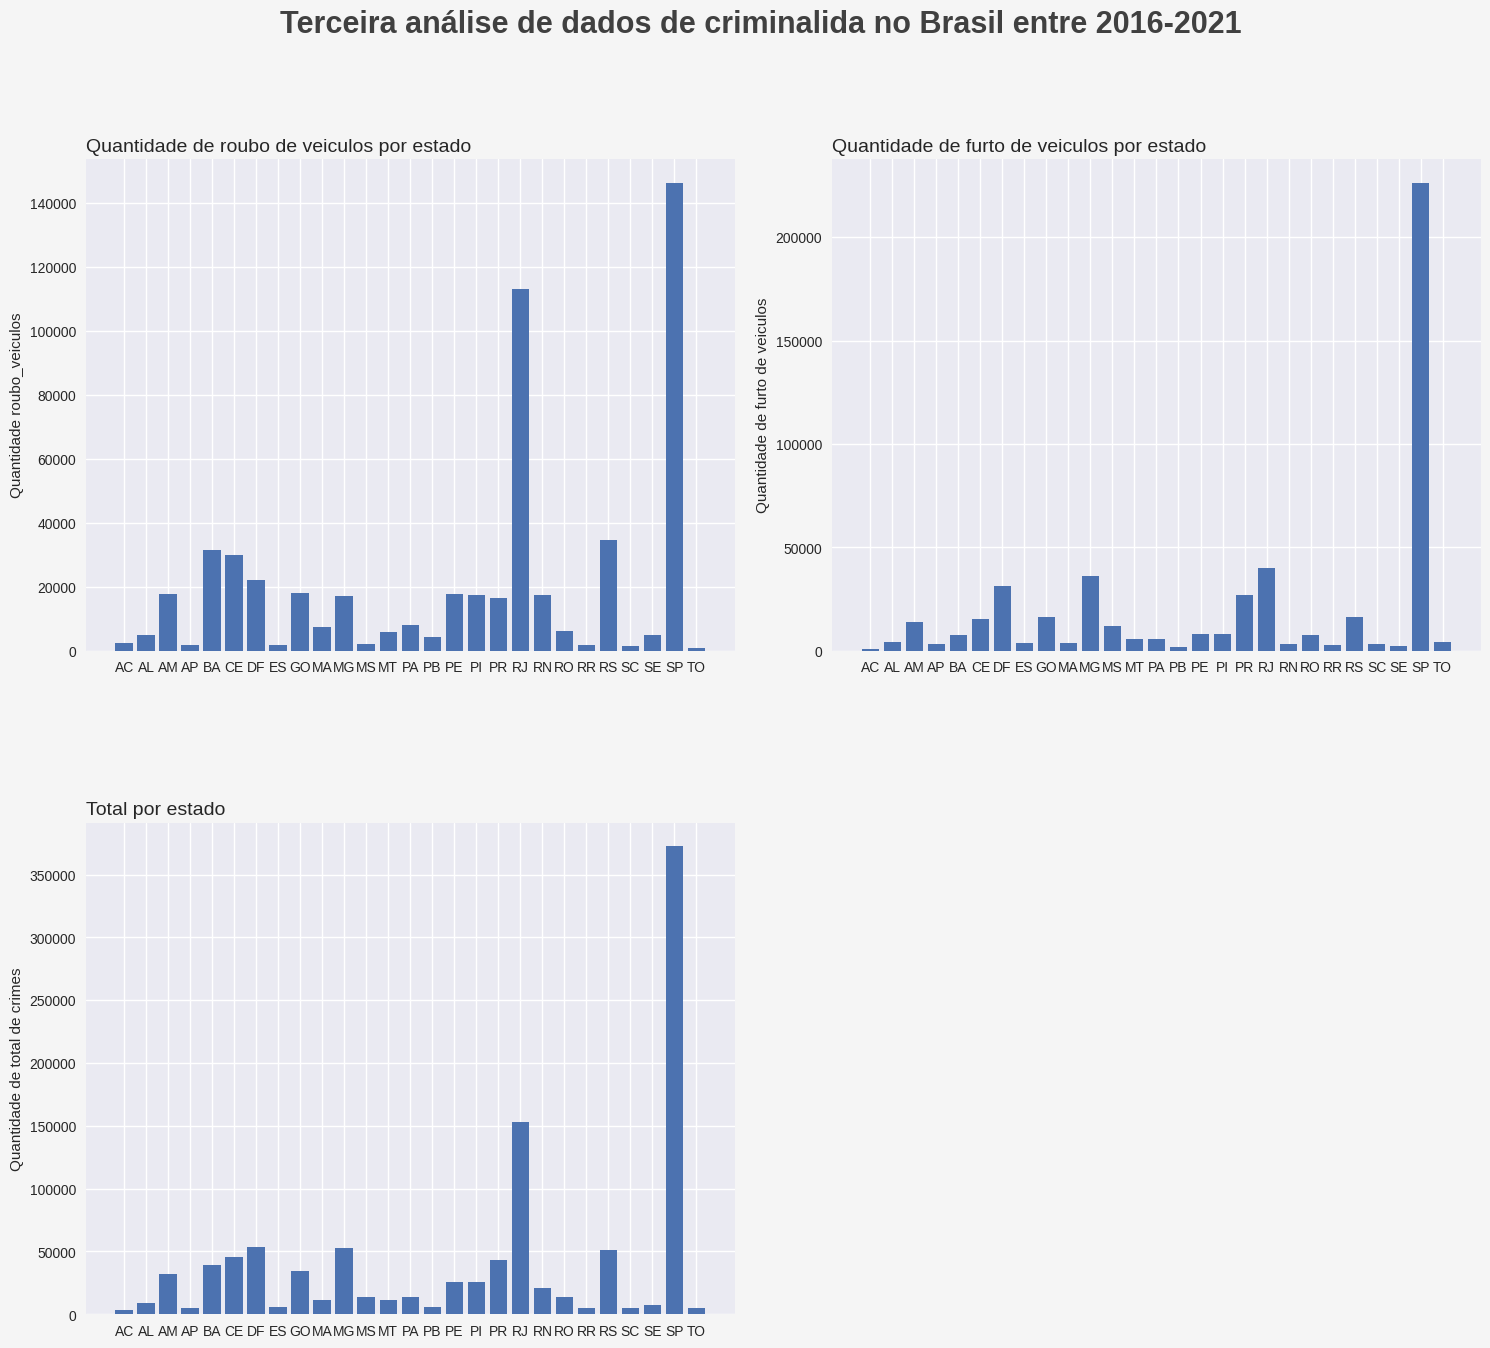

In [53]:
# Criando relátorio 


# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18, 15))
colunas = 2
linhas = 2

# cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos 
plt.style.use('seaborn')

# incluindo subtitulo
plt.suptitle('Terceira análise de dados de criminalida no Brasil entre 2016-2021', fontsize=22, color='#404040', fontweight=600)

# Parametros para os grid 
for c in range(1, 4): 
  plt.subplot(linhas, colunas, c)
  if c == 1:
    # Titulo
      plt.title('Quantidade de roubo de veiculos por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_3['sigla_uf'], analise_3['quantidade_roubo_veiculos'])

      # Label
      plt.ylabel('Quantidade roubo_veiculos');
  elif c == 2:
    # Titulo
      plt.title('Quantidade de furto de veiculos por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_3['sigla_uf'], analise_3['quantidade_furto_veiculos'])

      # Label
      plt.ylabel('Quantidade de furto de veiculos');
  else:
    # Titulo
      plt.title('Total por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_3['sigla_uf'], analise_3['total'])

      # Label
      plt.ylabel('Quantidade de total de crimes');
  

# Ajustando o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15 )


#Criando o terceiro relátorio através da biblioteca do power bi 

In [48]:
PBI_visualize_3 = QuickVisualize(get_dataset_config(analise_3), auth=device_auth)

In [49]:
PBI_visualize_3

QuickVisualize()

#Quarta Análise

Nessa quarta análise foi verificado os estados que contém a maior quantidade de morte de policiais civis e militares no Brasil

In [29]:
analise_4 = df[['sigla_uf', 'quantidade_morte_policiais_civis_confronto_em_servico',
                'quantidade_morte_policiais_militares_confronto_em_servico',
                'quantidade_morte_policiais_civis_fora_de_servico',
                'quantidade_morte_policiais_militares_fora_de_servico']]

analise_4

,sigla_uf,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,AL,0,2,1,2
1,CE,0,1,2,5
2,ES,0,0,0,0
3,GO,0,0,0,3
4,MA,0,0,0,1
...,...,...,...,...,...
157,AC,<NA>,<NA>,<NA>,<NA>
158,AM,<NA>,<NA>,<NA>,<NA>
159,AP,<NA>,<NA>,<NA>,<NA>
160,RO,<NA>,<NA>,<NA>,<NA>


In [30]:
#Agrupando por Uf

analise_4 = analise_4.groupby(by='sigla_uf').sum().reset_index()
analise_4

,sigla_uf,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,AC,0,1,1,3
1,AL,0,2,1,2
2,AM,0,2,0,10
3,AP,0,0,0,1
4,BA,1,2,2,9
5,CE,0,2,3,21
6,DF,0,1,1,6
7,ES,0,0,0,0
8,GO,0,0,0,5
9,MA,0,0,0,1


In [31]:
# Criando coluna Total
analise_4['total'] = analise_4['quantidade_morte_policiais_civis_confronto_em_servico'] + analise_4['quantidade_morte_policiais_civis_fora_de_servico'] + analise_4['quantidade_morte_policiais_militares_confronto_em_servico'] + analise_4['quantidade_morte_policiais_militares_fora_de_servico']
analise_4

,sigla_uf,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico,total
0,AC,0,1,1,3,5
1,AL,0,2,1,2,5
2,AM,0,2,0,10,12
3,AP,0,0,0,1,1
4,BA,1,2,2,9,14
5,CE,0,2,3,21,26
6,DF,0,1,1,6,8
7,ES,0,0,0,0,0
8,GO,0,0,0,5,5
9,MA,0,0,0,1,1


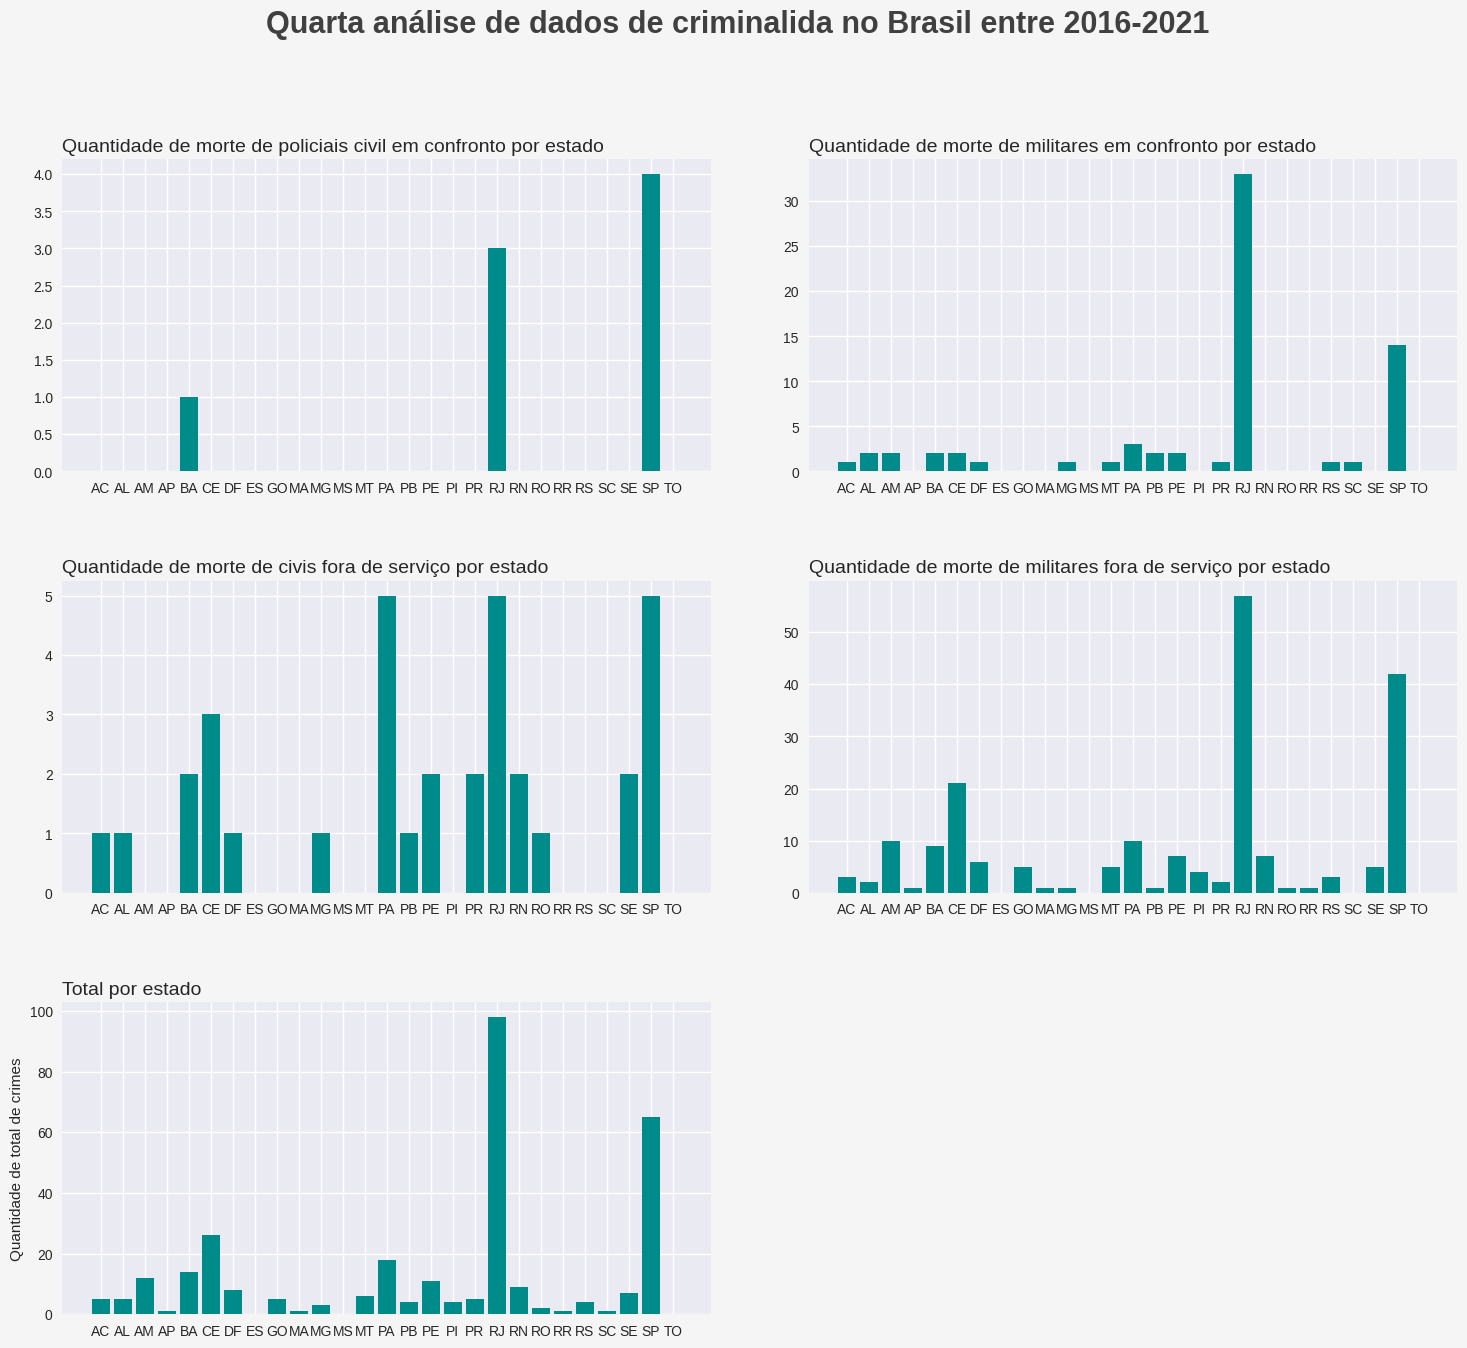

In [52]:
# Criando relátorio 


# Tamanho da imagem
fig, ax = plt.subplots(figsize=(18, 15))
colunas = 2
linhas = 3

# cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos 
plt.style.use('seaborn')

# incluindo subtitulo
plt.suptitle('Quarta análise de dados de criminalida no Brasil entre 2016-2021', fontsize=22, color='#404040', fontweight=600)

# Parametros para os grid 
for c in range(1, 6): 
  plt.subplot(linhas, colunas, c)
  if c == 1:
    # Titulo
      plt.title('Quantidade de morte de policiais civil em confronto por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_4['sigla_uf'], analise_4['quantidade_morte_policiais_civis_confronto_em_servico'], color='darkcyan')

      # Label
      #plt.ylabel('Quantidade ');
  elif c == 2:
    # Titulo
      plt.title('Quantidade de morte de militares em confronto por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_4['sigla_uf'], analise_4['quantidade_morte_policiais_militares_confronto_em_servico'], color='darkcyan')

      # Label
      #plt.ylabel('Quantidade de furto de veiculos');
  elif c == 3:
    # Titulo
      plt.title('Quantidade de morte de civis fora de serviço por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_4['sigla_uf'], analise_4['quantidade_morte_policiais_civis_fora_de_servico'], color='darkcyan')

      # Label
      #plt.ylabel('Quantidade de furto de veiculos');
  elif c == 4:
    # Titulo
      plt.title('Quantidade de morte de militares fora de serviço por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_4['sigla_uf'], analise_4['quantidade_morte_policiais_militares_fora_de_servico'], color='darkcyan')

  else:
    # Titulo
      plt.title('Total por estado', loc='left', fontsize=14)

      # Grafico
      plt.bar(analise_4['sigla_uf'], analise_4['total'], color='darkcyan')

      # Label
      plt.ylabel('Quantidade de total de crimes');
  

# Ajustando o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15 )

#Criando o quarto relátorio através da biblioteca do power bi 

In [50]:
PBI_visualize_4 = QuickVisualize(get_dataset_config(analise_4), auth=device_auth)

In [51]:
PBI_visualize_4

QuickVisualize()

In [35]:
# Desabilitando configuração do colab

#from google.colab import output
#output.disable_custom_widget_manager()